In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score


merged_data = pd.read_csv("merged_data.csv")

X = merged_data[
    [
        "Wealth",
        # "Opportunities",
        "Career Years",
        "Sex",
        "Job",
        "Diseases",
        "Has Car",
        "Has House",
        # "Job Loss Probability",
        # "Reproduction Chance",
        "Child Possibility",
        "Personal Luxuries",
    ]
]
y = merged_data["Group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

y.value_counts()

Group
1    41332
0    23310
Name: count, dtype: int64

In [3]:
model = joblib.load("models/LightGBM.pkl")
y_pred = model.predict(X_test)

job = X_test["Job"]

mf = MetricFrame(
    metrics=accuracy_score, y_true=y_test, y_pred=y_pred, sensitive_features=job
)

print("Overall Metric Frame: ", mf.overall)
print("\nMetric Frame by group: ", mf.by_group)

Overall Metric Frame:  0.6629711751662971

Metric Frame by group:  Job
False    0.430380
True     0.679188
Name: accuracy_score, dtype: float64


The	Overall Metric Frame (0.6629) represents the specified overall performance metric (accuracy) across all groups combined. The value of 0.6629 suggests that the model’s accuracy is about 66.3% when evaluated on the entire dataset, without differentiating by groups.

The Metric Frame by Group (regarding Job) evaluates the model’s accuracy score for specific groups within the feature Job, divided into two categories, False and True:

- False (0.4304): For the group labeled False under Job, the model has an accuracy score of 43.0%. This indicates a notably lower performance for this group compared to the overall accuracy.
- True (0.6792): For the group labeled True under Job, the accuracy is 67.9%, which is closer to the overall accuracy score and significantly better than the False group.

array([[<Axes: title={'center': 'accuracy'}, xlabel='Job'>,
        <Axes: title={'center': 'precision'}, xlabel='Job'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='Job'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='Job'>,
        <Axes: title={'center': 'selection rate'}, xlabel='Job'>,
        <Axes: title={'center': 'count'}, xlabel='Job'>],
       [<Axes: xlabel='Job'>, <Axes: xlabel='Job'>, <Axes: xlabel='Job'>]],
      dtype=object)

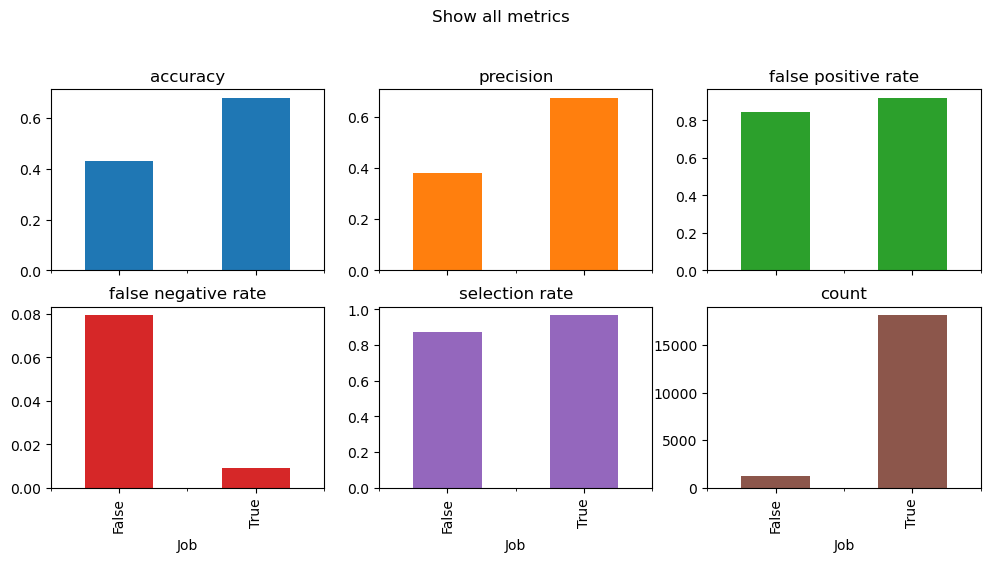

In [4]:
from fairlearn.metrics import (MetricFrame,  false_positive_rate,
    false_negative_rate, selection_rate, count)
from sklearn.metrics import (
    accuracy_score,
    precision_score
)

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=job
)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [16]:
from fairlearn.reductions import DemographicParity, ExponentiatedGradient

np.random.seed(42)

constraint = DemographicParity()
job = X_train["Job"]
mitigator = ExponentiatedGradient(model, constraint)
mitigator.fit(X_train, y_train, sensitive_features=job)

y_pred_mitigated = mitigator.predict(X_test)

job = X_test["Job"]
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=job)

sr_mitigated.overall

/Users/ricardoinacio/miniconda3/envs/ms/lib/python3.12/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/Users/ricardoinacio/miniconda3/envs/ms/

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28955, number of negative: 16294
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 45249, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639904 -> initscore=0.574946
[LightGBM] [Info] Start training from score 0.574946
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28955, number of negative: 16294
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_w

0.7293868921775899